# **Speech emotion recognition model**

This notebook explores the process of building, and testing a speech emotion recognition model. The data used in this process was obtained on [Kaggle](https://www.kaggle.com/datasets/dmitrybabko/speech-emotion-recognition-en). This dataset contains 4 most popular datasets in English for speech emotion: Crema, Ravdess, Savee and Tess. Each of the component datasets contains audio in .wav format and the filenames contain emotion labels for their content.


## **Loading and exploring data**

In [ ]:
# Connecting to Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

#Path to the audio dataset folder
dataset_path = '/content/drive/My Drive/SER Data'

In [ ]:
#Loading different data folders
tess = dataset_path + '/Tess'
savee = dataset_path + '/Savee'
ravdess = dataset_path + '/Ravdess/audio_speech_actors_01-24'
crema = dataset_path + '/Crema'

In [ ]:
# Counting the number of files in each folder
def count_files(folder_path):
    total_files = 0
    for root, dirs, files in os.walk(folder_path):
        total_files += len(files)
    return total_files

# nbr_tess_files = count_files(tess)
# nbr_savee_files = len(os.listdir(savee))
# nbr_ravdess_files = count_files(ravdess)
# nbr_crema_files = len(os.listdir(crema))


#Initializing the values after calculating them for the first time to avoid running this code multiple times as it takes time to run
nbr_tess_files = 2800
nbr_savee_files = 480
nbr_ravdess_files = 1440
nbr_crema_files = 7442

total_audio_files = nbr_tess_files + nbr_savee_files + nbr_ravdess_files + nbr_crema_files

print('The number of tess files is ', nbr_tess_files)
print('The number of savee files is ', nbr_savee_files)
print('The number of ravdess files is ', nbr_ravdess_files)
print('The number of crema files is ', nbr_crema_files)
print('The total number of all audio files is ', total_audio_files)

The number of tess files is  2800
The number of savee files is  480
The number of ravdess files is  1440
The number of crema files is  7442
The total number of all audio files is  12162


## **Creating a dataset of audio paths and their emotions**

In this section, each dataset among the four mentioned above, will be explored to create a combined dataset, which contains a path for each audio file and the emotion in that audio file.

### **Tess**

In [ ]:
import pandas as pd

# Creating empty arrays for keeping paths and emotions
emotions_list = []
paths_list = []

# Looping through the directory and extracting the emotion from each file name and keeping the emotion and the path in the above lists
for directory in os.listdir(tess):
  for audio_file in os.listdir(tess + '/' + directory):
    file_name = audio_file.split('.')[0]
    emotion = file_name.split('_')[2]
    if emotion == 'ps':
      emotion = 'surprise'

    emotions_list.append(emotion)
    file_path = tess + '/' + directory + '/' + audio_file
    paths_list.append(file_path)

# Creating a dataframe from the emotions and paths arrays
tess_data = pd.DataFrame({'Emotion': emotions_list, 'Path': paths_list})

In [ ]:
tess_data['Emotion'].value_counts()

angry       400
disgust     400
fear        400
happy       400
neutral     400
surprise    400
sad         400
Name: Emotion, dtype: int64

In [ ]:
tess_data.tail()

,Emotion,Path
2795,sad,/content/drive/My Drive/SER Data/Tess/YAF_sad/...
2796,sad,/content/drive/My Drive/SER Data/Tess/YAF_sad/...
2797,sad,/content/drive/My Drive/SER Data/Tess/YAF_sad/...
2798,sad,/content/drive/My Drive/SER Data/Tess/YAF_sad/...
2799,sad,/content/drive/My Drive/SER Data/Tess/YAF_sad/...


### **Savee**

In [ ]:
# Creating empty arrays for keeping paths and emotions
emotions_list = []
paths_list = []
savee_emotions = {'a': 'angry', 'd': 'disgust', 'f': 'fear', 'h': 'happy', 'n': 'neutral', 'sa': 'sad', 'su': 'surprise'}

# Looping through the directory and extracting the emotion from each file name and keeping the emotion and the path in the above lists
for audio_file in os.listdir(savee):
  file_name = audio_file.split('.')[0]
  emotion = file_name.split('_')[1][:-2]

  emotions_list.append(savee_emotions[emotion])
  file_path = savee + '/' + audio_file
  paths_list.append(file_path)

# Creating a dataframe from the emotions and paths arrays
savee_data = pd.DataFrame({'Emotion': emotions_list, 'Path': paths_list})

In [ ]:
savee_data['Emotion'].value_counts()

neutral     120
disgust      60
angry        60
happy        60
fear         60
sad          60
surprise     60
Name: Emotion, dtype: int64

In [ ]:
savee_data.tail()

,Emotion,Path
475,surprise,/content/drive/My Drive/SER Data/Savee/KL_su02...
476,sad,/content/drive/My Drive/SER Data/Savee/KL_sa15...
477,surprise,/content/drive/My Drive/SER Data/Savee/KL_su04...
478,sad,/content/drive/My Drive/SER Data/Savee/KL_sa14...
479,sad,/content/drive/My Drive/SER Data/Savee/KL_sa12...


### **Ravdess**

In [ ]:
# Creating empty arrays for keeping paths and emotions
emotions_list = []
paths_list = []
ravdess_emotions = {1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}

# Looping through the directory and extracting the emotion from each file name and keeping the emotion and the path in the above lists
for directory in os.listdir(ravdess):
  for audio_file in os.listdir(ravdess + '/' + directory):
    file_name = audio_file.split('.')[0]
    emotion = file_name.split('-')[2]

    emotions_list.append(ravdess_emotions[int(emotion)])
    file_path = ravdess + '/' + directory + '/' + audio_file
    paths_list.append(file_path)

# Creating a dataframe from the emotions and paths arrays
ravdess_data = pd.DataFrame({'Emotion': emotions_list, 'Path': paths_list})

In [ ]:
ravdess_data['Emotion'].value_counts()

angry       192
sad         192
happy       192
calm        192
surprise    192
disgust     192
fear        192
neutral      96
Name: Emotion, dtype: int64

In [ ]:
ravdess_data.tail()

,Emotion,Path
1435,angry,/content/drive/My Drive/SER Data/Ravdess/audio...
1436,angry,/content/drive/My Drive/SER Data/Ravdess/audio...
1437,angry,/content/drive/My Drive/SER Data/Ravdess/audio...
1438,fear,/content/drive/My Drive/SER Data/Ravdess/audio...
1439,angry,/content/drive/My Drive/SER Data/Ravdess/audio...


### **Crema**

In [ ]:
# Creating empty arrays for keeping paths and emotions
emotions_list = []
paths_list = []
crema_emotions = {'SAD': 'sad', 'ANG': 'angry', 'DIS': 'disgust', 'FEA': 'fear', 'HAP': 'happy', 'NEU': 'neutral'}

# Looping through the directory and extracting the emotion from each file name and keeping the emotion and the path in the above lists
for audio_file in os.listdir(crema):
  file_name = audio_file.split('.')[0]
  emotion = file_name.split('_')[2]
  emotions_list.append(crema_emotions[emotion])
  file_path = crema + '/' + audio_file
  paths_list.append(file_path)

# Creating a dataframe from the emotions and paths arrays
crema_data = pd.DataFrame({'Emotion': emotions_list, 'Path': paths_list})

In [ ]:
crema_data['Emotion'].value_counts()

fear       1271
sad        1271
angry      1271
disgust    1271
happy      1271
neutral    1087
Name: Emotion, dtype: int64

In [ ]:
crema_data.tail()

,Emotion,Path
7437,happy,/content/drive/My Drive/SER Data/Crema/1091_MT...
7438,disgust,/content/drive/My Drive/SER Data/Crema/1091_MT...
7439,happy,/content/drive/My Drive/SER Data/Crema/1091_IW...
7440,neutral,/content/drive/My Drive/SER Data/Crema/1091_IW...
7441,fear,/content/drive/My Drive/SER Data/Crema/1091_IW...


In [ ]:
#Combining all the above datasets from each directory into one dataset by shuffling them
combined_data = pd.concat([tess_data, savee_data, ravdess_data, crema_data], ignore_index=True)
shuffled_data = combined_data.sample(frac=1).reset_index(drop=True)
shuffled_data.head()

,Emotion,Path
0,angry,/content/drive/My Drive/SER Data/Crema/1025_MT...
1,fear,/content/drive/My Drive/SER Data/Ravdess/audio...
2,angry,/content/drive/My Drive/SER Data/Crema/1040_DF...
3,fear,/content/drive/My Drive/SER Data/Tess/YAF_fear...
4,neutral,/content/drive/My Drive/SER Data/Crema/1082_IE...


In [ ]:
#Counting the number of audios per each emotion in the combined dataset
shuffled_data['Emotion'].value_counts()

angry       1923
fear        1923
sad         1923
disgust     1923
happy       1923
neutral     1703
surprise     652
calm         192
Name: Emotion, dtype: int64

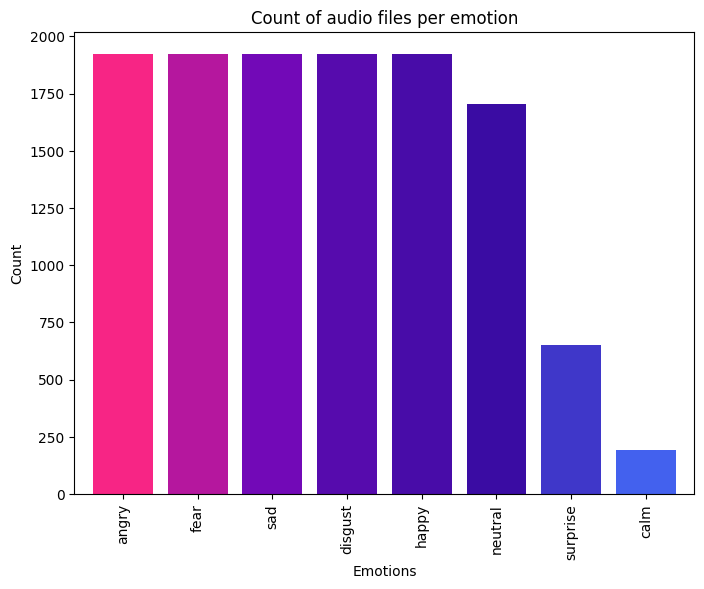

In [ ]:
import matplotlib.pyplot as plt

# Plotting the counts of each emotion on a bar chart
plt.figure(figsize=(8, 6))

shuffled_data['Emotion'].value_counts().plot(kind='bar', width=0.8, color=['#F72585', '#B5179E', '#7209B7', '#560BAD', '#480CA8', '#3A0CA3', '#3F37C9', '#4361EE'])
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Count of audio files per emotion')
plt.show()

## **Sampling data**

Here the dataset will be sampled using techniques like undersampling to ensure that bias from an imbalanced dataset is avoided.

In [ ]:
# Removing minority emotions with very few samples
filtered_data = shuffled_data[~shuffled_data['Emotion'].isin(['surprise','calm'])]

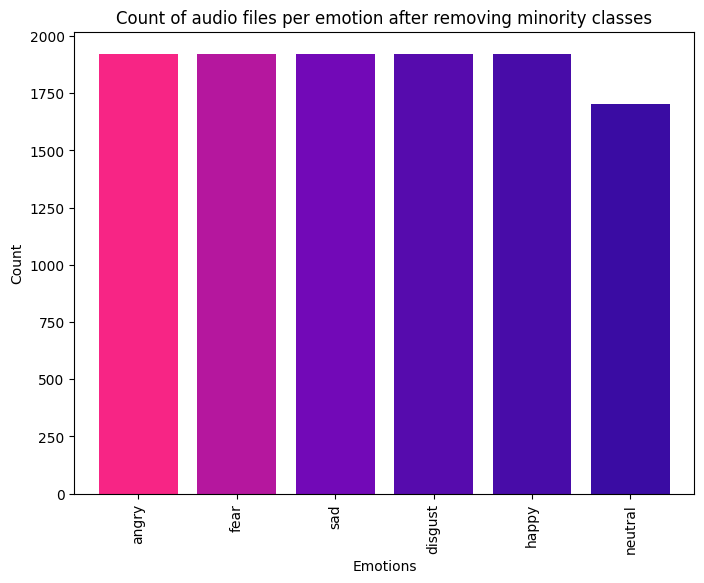

In [ ]:
#Plotting the number of samples for the remaining emotions

plt.figure(figsize=(8, 6))

filtered_data['Emotion'].value_counts().plot(kind='bar', width=0.8, color=['#F72585', '#B5179E', '#7209B7', '#560BAD', '#480CA8', '#3A0CA3'])
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Count of audio files per emotion after removing minority classes')
plt.show()

In [ ]:
# Get the count of records for each unique emotion
emotions_counts = filtered_data['Emotion'].value_counts()
print(emotions_counts)

angry      1923
fear       1923
sad        1923
disgust    1923
happy      1923
neutral    1703
Name: Emotion, dtype: int64


In [ ]:
# Downsampling the majority classes to have equal samples with the neutral emotion which has less samples

# Group the dataset by 'Emotion' column and perform random sampling
desired_samples = emotions_counts['neutral']
balanced_data = filtered_data.groupby('Emotion').apply(lambda x: x.sample(desired_samples) if len(x) >= desired_samples else x)

# Reset index after grouping
balanced_data.reset_index(drop=True, inplace=True)
balanced_data.head()

,Emotion,Path
0,angry,/content/drive/My Drive/SER Data/Crema/1073_IE...
1,angry,/content/drive/My Drive/SER Data/Crema/1091_WS...
2,angry,/content/drive/My Drive/SER Data/Crema/1002_IT...
3,angry,/content/drive/My Drive/SER Data/Crema/1085_IT...
4,angry,/content/drive/My Drive/SER Data/Crema/1030_IE...


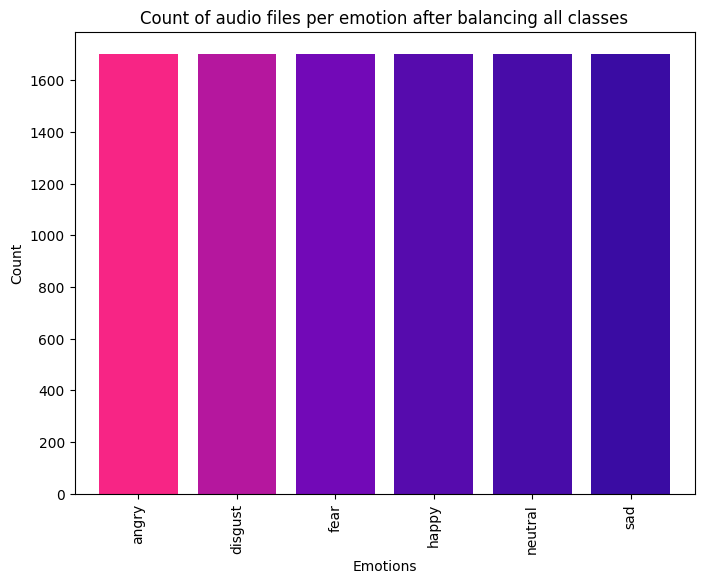

In [ ]:
# Ploting a bar chart of the emotion counts after taking equal samples from each
plt.figure(figsize=(8, 6))

balanced_data['Emotion'].value_counts().plot(kind='bar', width=0.8, color=['#F72585', '#B5179E', '#7209B7', '#560BAD', '#480CA8', '#3A0CA3'])
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Count of audio files per emotion after balancing all classes')
plt.show()

In [ ]:
# Get the count of records for each unique emotion
emotions_counts = balanced_data['Emotion'].value_counts()
print(emotions_counts)

angry      1703
disgust    1703
fear       1703
happy      1703
neutral    1703
sad        1703
Name: Emotion, dtype: int64


In [ ]:
import librosa.display
import random
from IPython.display import Audio, display

# Getting the unique emotions from the dataset
unique_emotions = balanced_data['Emotion'].unique()
sample_audio_paths = []

# Select a random sample for each emotion and adding it to the sample audios list
for emotion in unique_emotions:
    sample = balanced_data[balanced_data['Emotion'] == emotion].sample(1)
    sample_audio_paths.append(sample['Path'].values[0])

In [ ]:
#Loading a sample audio for each emotion
for i, path in enumerate(sample_audio_paths):
  print(f"Audio file for {unique_emotions[i]} emotion")
  display(Audio(filename=path))

Audio file for angry emotion


Audio file for disgust emotion


Audio file for fear emotion


Audio file for happy emotion


Audio file for neutral emotion


Audio file for sad emotion


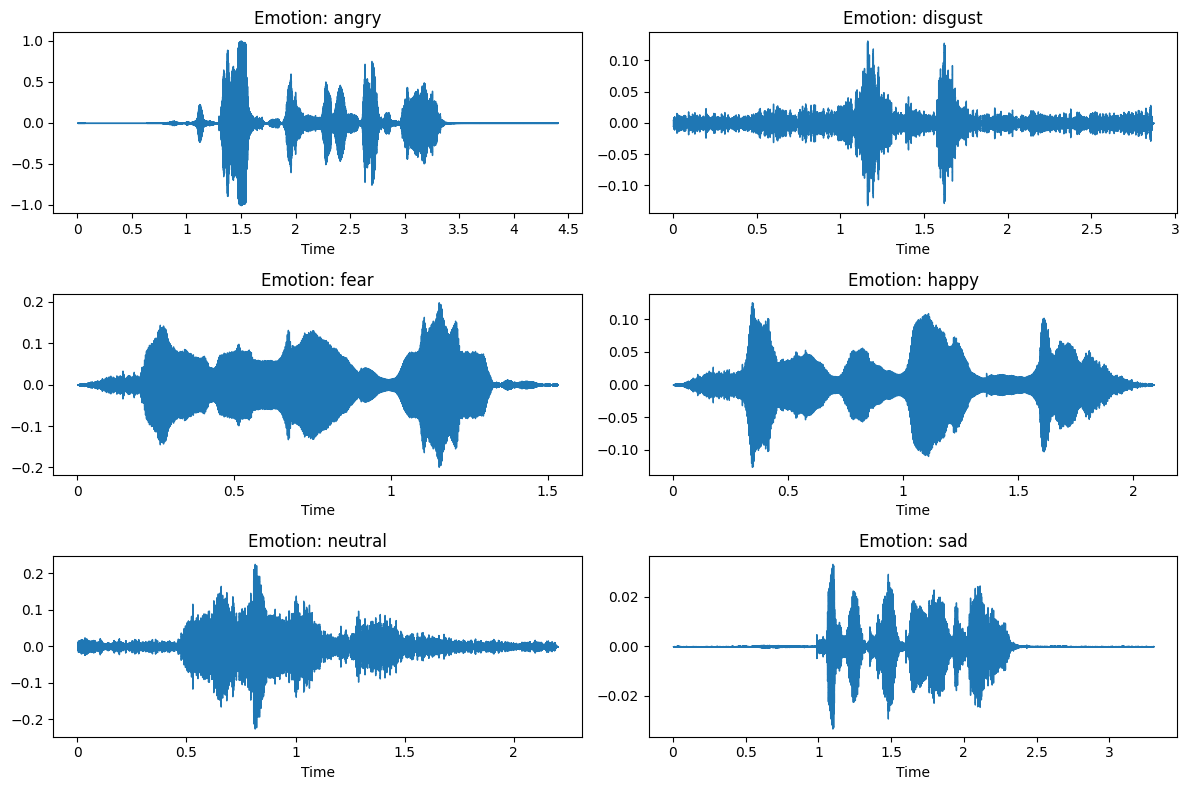

In [ ]:
# Creating a 3x2 subplot grid for wave plots of smaple emotions
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

# Plotting a waveform for each sample audio
for i, path in enumerate(sample_audio_paths):
    row = i // 2  # Calculate the row position
    col = i % 2   # Calculate the column position

    # Load the audio file and plot the waveform
    y, sr = librosa.load(path)
    axs[row, col].set_title(f"Emotion: {unique_emotions[i]}")
    librosa.display.waveshow(y, sr=sr, ax=axs[row, col])

plt.tight_layout()
plt.show()

### **Audio Augmentation**

Here different ways of augmenting the audio files will be explored using common ones like adding noise and pitch. However, I won't go into a lot of techniques given the limited computing resources, I will just try a few

In [ ]:
import numpy as np

# Defining augmentation functions to add noise and alter pitch of the audio files
def add_noise(data, rate = 0.035, threshold = 0.075, random=False,):
    # Noise rate is randomly generated basing on the threshold of 0.075 if random is true
    if random:
        rate = np.random.random() * threshold
    noise = rate * np.random.uniform() * np.amax(data)
    return data + noise * np.random.normal(size = data.shape[0])

def pitching(data, sr, pitch_factor = 0.7, random = False):
    # Pitch factor is randomly generated basing on the threshold of 0.7 if random is true
    if random:
        pitch_factor = np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(data, sr = sr, n_steps = pitch_factor)

Original audio file


Noised audio file


Pitched audio file


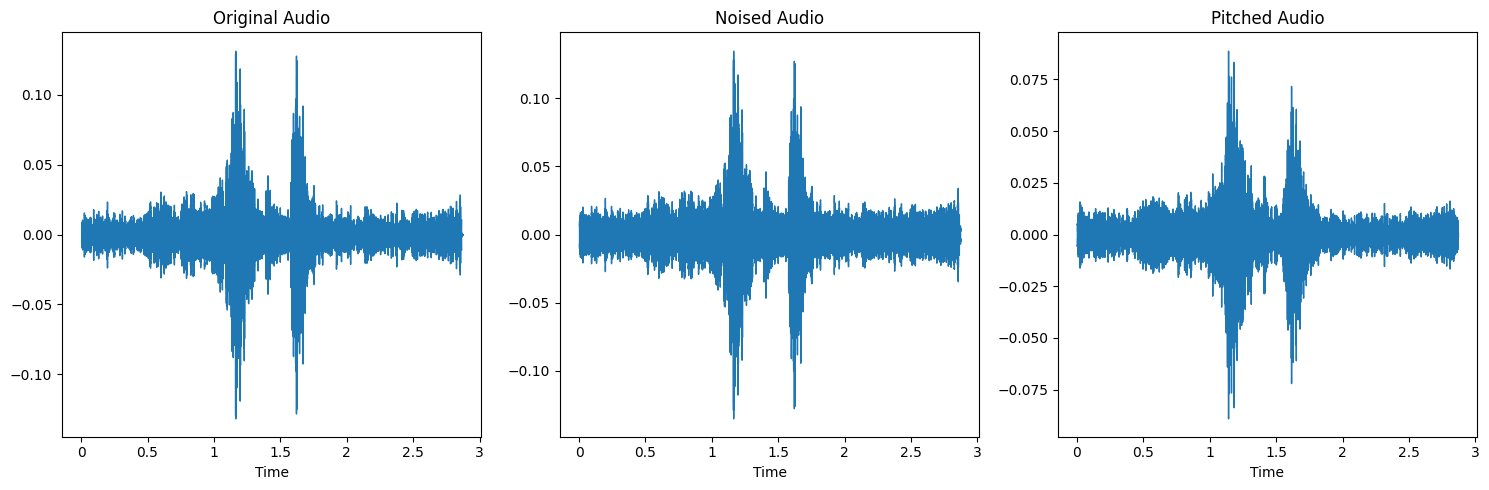

In [ ]:
#Sample augmented audio
sampling_data,sampling_rate = librosa.load(sample_audio_paths[1])
noised_audio = add_noise(sampling_data) # Adding noise to the sample audio
pitched_audio = pitching(sampling_data, sampling_rate) # Modifying the pitch of the sample audio

# Playing sample and augmented audios
print(f"Original audio file")
display(Audio(sample_audio_paths[1]))

print(f"Noised audio file")
display(Audio(noised_audio,rate=sampling_rate))

print(f"Pitched audio file")
display(Audio(pitched_audio, rate=sampling_rate))

audio_types = {
    'Original Audio': sampling_data,
    'Noised Audio': noised_audio,
    'Pitched Audio': pitched_audio
}

# Plotting waveforms for the original and augmented audios
plt.figure(figsize=(15, 5))

for i, (title, audio) in enumerate(audio_types.items(), 1):
    plt.subplot(1, len(audio_types), i)
    plt.title(title)
    librosa.display.waveshow(audio, sr=sampling_rate)

plt.tight_layout()
plt.show()


### **Feature extraction**

In [ ]:
#Function to extract important features in audio files analysis

def extract_features(data, sr, frame_length=2048, hop_length=512):
  result = np.array([])

  # Zero Crossing Rate
  zcr=np.squeeze(librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length))

  # Root Mean Square Value
  rmse=np.squeeze(librosa.feature.rms(y = data,frame_length=frame_length,hop_length=hop_length))

  # Mel Frequency Cepstral Coefficients
  mfcc=np.ravel(librosa.feature.mfcc(y = data,sr=sr).T)

  # Stacking the extracted features horixontally in an array
  result=np.hstack((result, zcr, rmse, mfcc))

  return result

In [ ]:
#Function that loads an audio from the path provided to it, augments it, and extracts features from the original and the augmented audios
def get_audio_features(path):
  #Loading the audio
  sampling_data,sampling_rate = librosa.load(path, duration=2.5, offset=0.6)

  # Getting features from the original data
  original_audio_features = extract_features(sampling_data, sampling_rate)
  features = np.array(original_audio_features)

  # Getting features from the noised data
  noised_audio = add_noise(sampling_data, random=True)
  noised_audio_features = extract_features(noised_audio, sampling_rate)
  features = np.vstack((features, noised_audio_features))

  # Getting features from the pitched Data
  pitched_audio_1 = pitching(sampling_data, sampling_rate, random=True)
  pitched_audio_features = extract_features(pitched_audio_1, sampling_rate)
  features = np.vstack((features, pitched_audio_features))

  # Getting features from the noised and pitched Data
  pitched_audio_2 = pitching(sampling_data, sampling_rate, random=True)
  pitched_noised_audio=add_noise(pitched_audio_2, random=True)
  pitched_noised_audio_features = extract_features(pitched_noised_audio, sampling_rate)

  # Stacking features of each version in a list vertically
  features = np.vstack((features, pitched_noised_audio_features))

  return features

These two blocks of code below go through all rows of the dataset calling the function to extract features for each audio and compiling the features and the predefined emotions from the audio in a dataset, to form a dataset of features and emotions.

Given the size of the dataset the first block of code took a lot of time to run and it was commented after running for the first time and its output was saved in the second code cell, so that the features dataset can be uploaded into the notebook, and be used easily rather than running the code again everytime.


In [ ]:
# X,Y=[],[]
# for path, emotion, index in zip(balanced_data.Path, balanced_data.Emotion, range(balanced_data.Path.shape[0])):
#   features=get_audio_features(path)
#   for i in features:
#       X.append(i)
#       Y.append(emotion)

#   if index%1000==0:
#       print(f'{index} audio has been processed')

In [ ]:
# features_dataset=pd.DataFrame(X)
# features_dataset['Emotion']=Y
# features_dataset.to_csv('/content/drive/My Drive/SER Features Data',index=False)

In [ ]:
import pandas as pd

#Loading the features dataset
feature_dataset=pd.read_csv('/content/drive/My Drive/SER Features Data')
feature_dataset.shape

(40872, 2377)

In [ ]:
feature_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotion
0,0.136230,0.220703,0.308594,0.298340,0.305176,0.276855,0.250977,0.267090,0.250000,0.264648,...,1.490006,1.535292,1.652979,1.825253,2.030040,2.243466,2.442481,2.607054,2.722209,angry
1,0.244629,0.365234,0.491211,0.488281,0.491211,0.493164,0.482422,0.482910,0.484375,0.479980,...,-1.592292,-1.673234,-1.634080,-0.753456,-4.398276,-2.910459,0.884891,-1.443578,-7.878388,angry
2,0.117676,0.173340,0.228516,0.218750,0.226074,0.224121,0.228027,0.233887,0.217285,0.228516,...,1.971316,1.913057,1.856474,1.802503,1.751919,1.705316,1.663128,1.625567,1.592685,angry
3,0.255371,0.376465,0.505371,0.501953,0.495117,0.489746,0.492676,0.496582,0.506348,0.508301,...,-0.098673,-2.072243,1.251883,3.934214,-5.618647,-0.564245,-2.256442,-3.148214,3.315486,angry
4,0.025879,0.108398,0.201172,0.278809,0.290527,0.211426,0.122559,0.038086,0.017578,0.024902,...,4.480437,3.337193,2.659195,2.258952,1.921073,1.591377,1.404836,1.559818,2.152750,angry


In [ ]:
# This functions checks if we have columns with missing values in the fetaures dataset

def get_missing_value_columns():
  # Check for missing values in each column
  columns_with_missing_values = feature_dataset.isnull().sum()

  # Count the number of columns with missing values
  num_columns_with_missing_values = columns_with_missing_values[columns_with_missing_values > 0].count()

  # Display the number of columns with missing values
  print(f"Number of columns with missing values: {num_columns_with_missing_values}")

In [ ]:
get_missing_value_columns()

Number of columns with missing values: 1738


In [ ]:
# Replacing the missing values with 0 if any
feature_dataset = feature_dataset.fillna(0)

In [ ]:
get_missing_value_columns()

Number of columns with missing values: 0


In [ ]:
# Extract the target column from the dataset
Y = feature_dataset['Emotion']

# Remove the target column from the DataFrame to obtain the feature columns
X = feature_dataset.drop(columns=['Emotion'])

In [ ]:
# Scaling the features so that training the model can get the best results
from sklearn.preprocessing import StandardScaler

# Initializing and training the scaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
print(X)

[[ 1.05982021  1.23697162  1.36443321 ...  1.00739181  1.14254287
   1.24797369]
 [ 2.59851585  2.63185587  2.71189268 ...  0.44741429 -0.55187359
  -3.15141709]
 [ 0.79643987  0.77986428  0.77356863 ...  0.7272024   0.73197812
   0.7792062 ]
 ...
 [ 2.17572111  1.99567555  1.93728363 ... -0.00975024 -0.63982089
   2.30626127]
 [-0.87394594 -0.81765517 -0.82608914 ...  0.66254188  0.53800369
   0.48250294]
 [ 2.49454993  2.63185587  2.61821903 ...  0.06131299 -1.74462936
  -1.84824879]]


In [ ]:
# Perform one-hot encoding on the categorical classes of the target column
Y = pd.get_dummies(Y, prefix='Emotion')

# Convert the resulting DataFrame to a NumPy array
Y = Y.to_numpy()

# Display the resulting array
print(Y)

[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the training and validation datasets with 80% for training and 20% for validation
X_train,X_val,y_train,y_val=train_test_split(X,Y,random_state=24,test_size=0.2,shuffle=True)
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((32697, 2376), (8175, 2376), (32697, 6), (8175, 6))

In [ ]:
# Splitting the training dataset obtained in the above step into training and testing datasets with 80% for training and 20% for testing, to get a reserved
# testing dataset not used in the model training process
X_train,X_test,y_train,y_test =train_test_split(X_train,y_train,random_state=24,test_size=0.2,shuffle=True)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((26157, 2376), (8175, 2376), (6540, 2376), (26157, 6), (8175, 6), (6540, 6))

In [ ]:
import numpy as np

# expanding the dimensions of the features datasets to match the inputs receivable by the keras model defined below
X_train=np.expand_dims(X_train,axis=2)
X_val=np.expand_dims(X_val,axis=2)
X_test=np.expand_dims(X_test,axis=2)
X_train.shape, X_test.shape, X_val.shape

((26157, 2376, 1), (6540, 2376, 1), (8175, 2376, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPool1D, Dense, Flatten
from tensorflow.keras.metrics import AUC, Precision, Recall

# Creating a Sequential model
model = Sequential()

# Convolutional Layer 1
model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=5, strides=2, padding='same'))

# Convolutional Layer 2
model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=5, strides=2, padding='same'))

# Convolutional Layer 3
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=5, strides=2, padding='same'))

# Convolutional Layer 4
model.add(Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=5, strides=2, padding='same'))

# Convolutional Layer 5
model.add(Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=3, strides=2, padding='same'))

# Flattening the output for Dense layers
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())

# Output Layer
model.add(Dense(6, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall(), AUC()])

# Displaying model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 512)         3072      
                                                                 
 batch_normalization (Batch  (None, 2376, 512)         2048      
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 1188, 512)         0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_1 (Bat  (None, 1188, 512)         2048      
 chNormalization)                                                
                                                        

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Defining the early stopping and learning rate reduction callbacks to be used in training the model
early_stop=EarlyStopping(monitor='val_accuracy',mode='auto',patience=10,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=5,verbose=1,factor=0.5,min_lr=0.0001)

# Training the model
history=model.fit(X_train, y_train, epochs=50, validation_data=(X_val,y_val), batch_size=64,callbacks=[early_stop,lr_reduction])

Epoch 1/50
409/409 [==============================] - 157s 338ms/step - loss: 1.3815 - accuracy: 0.4665 - precision: 0.6156 - recall: 0.2968 - auc: 0.8084 - val_loss: 1.7778 - val_accuracy: 0.2610 - val_precision: 0.3017 - val_recall: 0.1709 - val_auc: 0.6998 - lr: 0.0010
Epoch 2/50
409/409 [==============================] - 148s 363ms/step - loss: 1.0992 - accuracy: 0.5694 - precision: 0.7147 - recall: 0.4136 - auc: 0.8757 - val_loss: 1.3198 - val_accuracy: 0.4893 - val_precision: 0.5957 - val_recall: 0.3624 - val_auc: 0.8287 - lr: 0.0010
Epoch 3/50
409/409 [==============================] - 148s 363ms/step - loss: 0.9715 - accuracy: 0.6209 - precision: 0.7476 - recall: 0.4845 - auc: 0.9039 - val_loss: 1.3003 - val_accuracy: 0.5387 - val_precision: 0.6254 - val_recall: 0.4373 - val_auc: 0.8499 - lr: 0.0010
Epoch 4/50
409/409 [==============================] - 148s 362ms/step - loss: 0.8705 - accuracy: 0.6681 - precision: 0.7735 - recall: 0.5538 - auc: 0.9232 - val_loss: 1.0813 - val_a

In [ ]:
# Evaluating the model on test dataset, and evaluating it on different metrics relevant to the multi-class classification task
results = model.evaluate(X_test, y_test, verbose=0)
test_loss = results[0]
accuracy = results[1]
precision = results[2]
recall = results[3]
auc = results[4]

print("Test Loss:", test_loss)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)

Test Loss: 0.29038095474243164
Accuracy: 0.945412814617157
Precision: 0.9480878710746765
Recall: 0.9438837766647339
AUC: 0.987556517124176


**Interpretation:**
1. **Test Loss (0.290):** This metric measures the error of the model on the test dataset. This low value indicates good model performance.

2. **Accuracy (0.945):** This represents the ratio of correctly predicted emotions to the total number of samples in the test dataset. It's high value indicates a high level of correctness in the model's predictions.

3. **Precision (0.948):** It is the ratio of correctly predicted positive observations to the total predicted positive observations. A high value indicates good performance in positive predictions made by the model.

4. **Recall (0.944):** Recall measures the ability of the model to correctly identify positive samples. It is the ratio of correctly predicted positive observations to all actual positive observations.

5. **AUC (0.988):** Area Under the Curve (AUC) is the area under the Receiver Operating Characteristic (ROC) curve. It represents the model's ability to distinguish between classes. A higher AUC value signifies better performance.

Overall, these metrics collectively demonstrate that the model performs well in correctly classifying emotions from speech, showcasing high accuracy, precision, recall, and a strong ability to differentiate between different emotions.

In [ ]:
# Getting the numerical represantations of the emotions in the testing set using the maximum index in a row
y_actual=np.argmax(y_test,axis=1)
y_actual

array([5, 0, 0, ..., 4, 2, 3])

In [ ]:
# Using the model to predicton the testing set and and getting the most accurate emotion for each row by getting the maximum propability in the row
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

205/205 [==============================] - 9s 44ms/step


array([5, 0, 0, ..., 4, 2, 3])

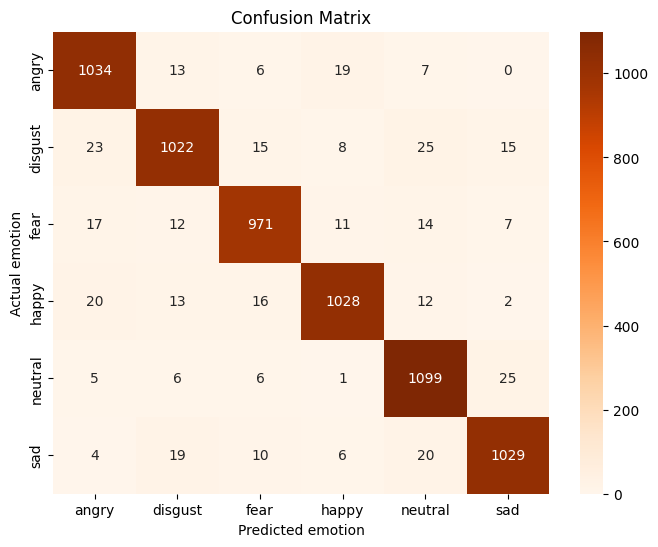

In [ ]:
# Calculating and plotting the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score

# Calculate the confusion matrix
cm = confusion_matrix(y_actual, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels = unique_emotions,
            yticklabels = unique_emotions)
plt.xlabel('Predicted emotion')
plt.ylabel('Actual emotion')
plt.title('Confusion Matrix')
plt.show()

This confusion matric shows that most of the emotions in the test dataset were accurately predicted.

In [ ]:
# Saving the model
model.save('ser_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Downloading the model file
from google.colab import files

files.download('ser_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Model Optimization**

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPool1D, Dense, Flatten
from tensorflow.keras.metrics import AUC, Precision, Recall, F1Score

# Function that creates a model based on the parameters passed to it
def create_model(optimizer, learning_rate=0.001):
  # Creating a Sequential model
  model = Sequential()

  # Convolutional Layer 1
  model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)))
  model.add(BatchNormalization())
  model.add(MaxPool1D(pool_size=5, strides=2, padding='same'))

  # Convolutional Layer 2
  model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool1D(pool_size=5, strides=2, padding='same'))

  # Convolutional Layer 3
  model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool1D(pool_size=5, strides=2, padding='same'))

  # Convolutional Layer 4
  model.add(Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool1D(pool_size=5, strides=2, padding='same'))

  # Convolutional Layer 5
  model.add(Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool1D(pool_size=3, strides=2, padding='same'))

  # Flattening the output for Dense layers
  model.add(Flatten())

  # Fully Connected Layer 1
  model.add(Dense(512, activation='relu'))
  model.add(BatchNormalization())

  # Output Layer
  model.add(Dense(6, activation='softmax'))

  # Using different optimizers based on the parameter passed
  opt = None
  if optimizer == 'sgd':
    opt = SGD(learning_rate=learning_rate)
  elif optimizer == 'rmsprop':
    opt = RMSprop(learning_rate=learning_rate)

  # Compiling and returning the model
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall(), AUC(), F1Score()])
  return model

In [ ]:
from sklearn.model_selection import ParameterGrid
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Parameter grid
param_grid = {
    'optimizer': ['sgd', 'rmsprop']
}

# Callbacks in training
early_stop=EarlyStopping(monitor='val_accuracy',mode='auto',patience=10,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=5,verbose=1,factor=0.5,min_lr=0.0001)

#Variables for keeping the best model and its score
best_model = None
best_score = 0

# Changin the datatype of the target column to be able to use the F1_Score metric
y_train_float32 = y_train.astype('float32')
y_val_float32 = y_val.astype('float32')

# looping though the param grid to create and fit a model with different parameter combinations
for params in ParameterGrid(param_grid):
    model = create_model(optimizer=params['optimizer'])
    history = model.fit(X_train, y_train_float32, epochs=50, batch_size=64,
                        validation_data=(X_val, y_val_float32), callbacks=[early_stop, lr_reduction])

    # Check and update best model
    if history.history['val_accuracy'][-1] > best_score:
        best_score = history.history['val_accuracy'][-1]
        best_model = model

Epoch 1/50
409/409 [==============================] - 164s 357ms/step - loss: 1.5019 - accuracy: 0.4237 - precision: 0.5552 - recall: 0.2585 - auc: 0.7686 - f1_score: 0.4178 - val_loss: 1.7371 - val_accuracy: 0.2991 - val_precision: 0.3884 - val_recall: 0.1412 - val_auc: 0.6773 - val_f1_score: 0.2803 - lr: 0.0010
Epoch 2/50
409/409 [==============================] - 149s 364ms/step - loss: 1.1682 - accuracy: 0.5468 - precision: 0.7090 - recall: 0.3771 - auc: 0.8586 - f1_score: 0.5430 - val_loss: 1.1550 - val_accuracy: 0.5479 - val_precision: 0.7172 - val_recall: 0.3856 - val_auc: 0.8622 - val_f1_score: 0.5413 - lr: 0.0010
Epoch 3/50
409/409 [==============================] - 139s 341ms/step - loss: 1.0403 - accuracy: 0.5988 - precision: 0.7556 - recall: 0.4376 - auc: 0.8894 - f1_score: 0.5963 - val_loss: 1.1220 - val_accuracy: 0.5605 - val_precision: 0.7105 - val_recall: 0.4272 - val_auc: 0.8713 - val_f1_score: 0.5589 - lr: 0.0010
Epoch 4/50
409/409 [==============================] - 1

In [ ]:
# Saving the best model
best_model.save('optimized_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Converting the datatype of the target column in testing set to be able to use F1_Score in evaluating the model performance
y_test = y_test.astype(np.float32)
results = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
# Printing the evaluation metrics results
test_loss = results[0]
accuracy = results[1]
precision = results[2]
recall = results[3]
auc = results[4]
f1_score = results[5]

print("Test Loss:", test_loss)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)
print('F1 Score:', f1_score)


Test Loss: 0.36176440119743347
Accuracy: 0.9415901899337769
Precision: 0.9432602524757385
Recall: 0.9405198693275452
AUC: 0.9850289821624756
F1 Score: [0.9494305  0.92844033 0.93455243 0.94025016 0.94919676 0.9468822 ]


In [ ]:
# Getting the numerical represantations of the emotions in the testing set using the maximum index in a row
y_actual_2=np.argmax(y_test,axis=1)
y_actual_2

array([5, 0, 0, ..., 4, 2, 3])

In [ ]:
# Using the model to predict on the testing set and and getting the most accurate emotion for each row by getting the maximum propability in the row
y_pred_2 = model.predict(X_test)
y_pred_2 = np.argmax(y_pred_2, axis=1)
y_pred_2

205/205 [==============================] - 10s 44ms/step


array([5, 0, 0, ..., 4, 2, 3])

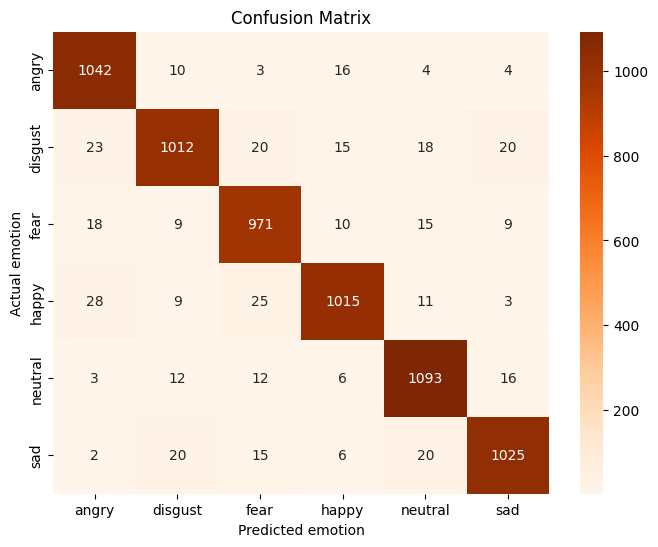

In [ ]:
# Calculating and plotting the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_actual_2, y_pred_2)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels = unique_emotions,
            yticklabels = unique_emotions)
plt.xlabel('Predicted emotion')
plt.ylabel('Actual emotion')
plt.title('Confusion Matrix')
plt.show()

**Interpretation:** According the performance comparision using Adam as an optimiser performs slightly better than sgd and rmsprop, so there has not been any improvement of the model using either sgd and rmsprop.

Here's a comparison of how the metrics changed from model which used Adam optimizer to optimized model which uses the best model between sgd and rmsprop

**Test Loss:** Increased from 0.2904 to 0.3618

**Accuracy:** Decreased from 0.9454 to 0.9416

**Precision:** Decreased from 0.9481 to 0.9433

**Recall:** Decreased from 0.9439 to 0.9405

**AUC:** Decreased from 0.9876 to 0.9850

**NOTE:** The model optimization was cut short by the available resources like computing power and time. From the initial model training process, it was evident that the model improved as the number of epochs increased, and the model itself performed better with more Convolutional layers added to it even though at some point adding more layers worsened the model performance. I believe that the model performs really well even without optimization with an accuracy of 94% but there's so much that could be tested to improve the accuracy like testing different learning rates, altering the model architecture, and more data augmentation.